In [31]:
import base64
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import yaml

from dateutil import relativedelta

In [65]:
url = "https://docs.google.com/spreadsheets/d/1RblHxOcXIFd2tg4P7cHtZNuElin5ifOHt_0KawkYU7A/export?format=csv&id=1RblHxOcXIFd2tg4P7cHtZNuElin5ifOHt_0KawkYU7A"
df = (pd.read_csv(url).fillna(''))
df

,id,run_accession,sample_link,type,type_of_data,target,sequencing_technique,published_date,publication,Unnamed: 9,Unnamed: 10
0,1,SRR5740340,https://www.ebi.ac.uk/ena/browser/view/SRR5740340,Beer,Amplicon,ITS,Illumina,Oct 2017,BeerDeCoded: the open beer metagenome project,,
1,1,SRR5740341,https://www.ebi.ac.uk/ena/browser/view/SRR5740341,Beer,Amplicon,ITS,Illumina,Oct 2017,BeerDeCoded: the open beer metagenome project,,
2,1,SRR5740342,https://www.ebi.ac.uk/ena/browser/view/SRR5740342,Beer,Amplicon,ITS,Illumina,Oct 2017,BeerDeCoded: the open beer metagenome project,,
3,1,SRR5740343,https://www.ebi.ac.uk/ena/browser/view/SRR5740343,Beer,Amplicon,ITS,Illumina,Oct 2017,BeerDeCoded: the open beer metagenome project,,
4,1,SRR5740344,https://www.ebi.ac.uk/ena/browser/view/SRR5740344,Beer,Amplicon,ITS,Illumina,Oct 2017,BeerDeCoded: the open beer metagenome project,,
...,...,...,...,...,...,...,...,...,...,...,...
775,4,mgm4545648.3,MG-RAST archive,Beer,Amplicon,16S,Illumina,Jul 2014,Local domestication of lactic acid bacteria vi...,,
776,4,mgm4545649.3,MG-RAST archive,Beer,Amplicon,16S,Illumina,Jul 2014,Local domestication of lactic acid bacteria vi...,,
777,4,mgm4545650.3,MG-RAST archive,Beer,Amplicon,16S,Illumina,Jul 2014,Local domestication of lactic acid bacteria vi...,,
778,4,mgm4545651.3,MG-RAST archive,Beer,Amplicon,16S,Illumina,Jul 2014,Local domestication of lactic acid bacteria vi...,,


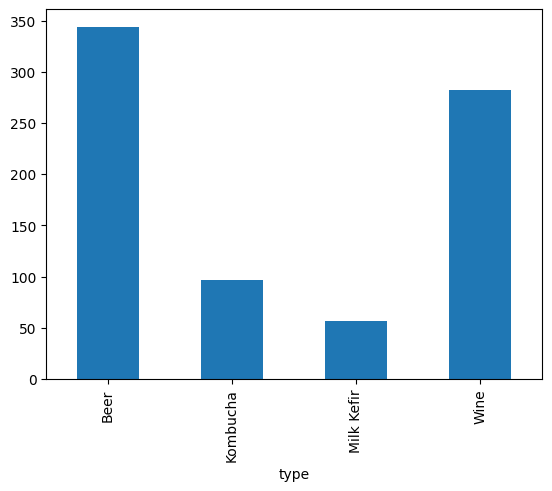

In [66]:
df_sample_count = df.groupby(['type'])['type'].count().plot.bar()

type_of_data  Amplicon  Shotgun
type                           
Beer             344.0      NaN
Kombucha          56.0     41.0
Milk Kefir        37.0     20.0
Wine             262.0     20.0


<AxesSubplot: xlabel='type'>

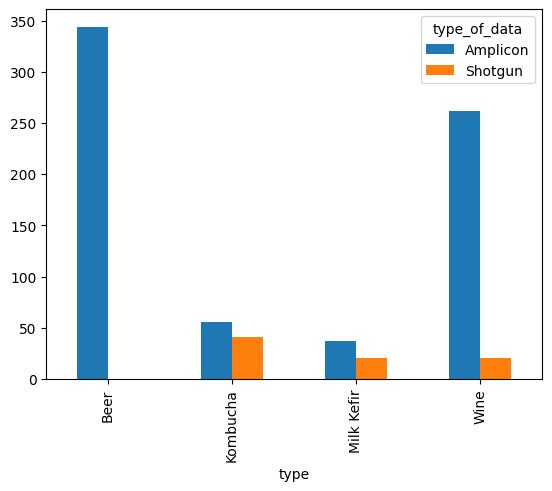

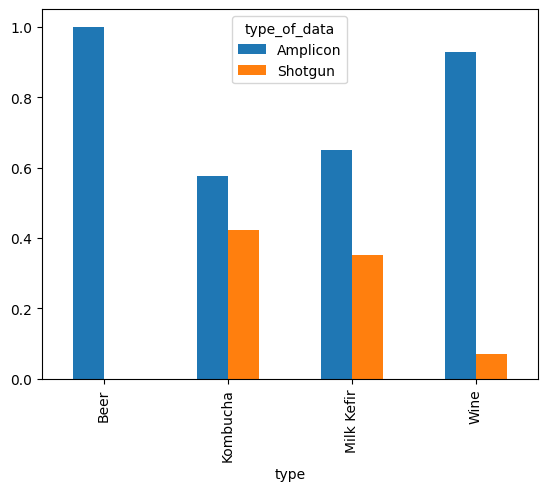

In [67]:
df_techniques = df.groupby(['type', 'type_of_data'])['id'].count().unstack('type_of_data')
print(df_techniques)
df_techniques.plot.bar()
df_techniques_freq = df_techniques.divide(df_techniques.sum(axis=1), axis=0)
df_techniques_freq.plot(kind="bar")

target        16S  26S  28S    ITS
type                              
Beer        129.0  NaN  NaN  215.0
Kombucha     28.0  NaN  NaN   28.0
Milk Kefir   20.0  NaN  2.0   15.0
Wine        117.0  6.0  NaN  139.0


<AxesSubplot: xlabel='type'>

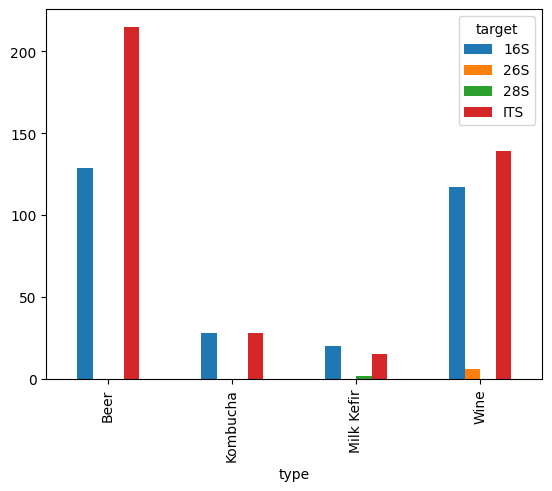

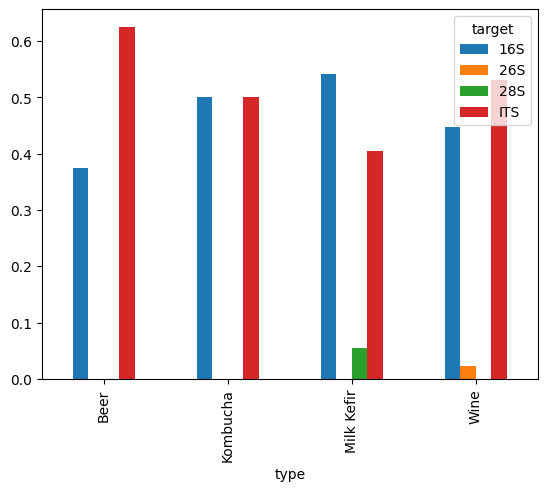

In [68]:
df_amplicon = df[df.type_of_data == 'Amplicon']

df_target = df_amplicon.groupby(['type', 'target'])['id'].count().unstack('target')
print(df_target)

df_target.plot.bar()

df_target_freq = df_target.divide(df_target.sum(axis=1), axis=0)
df_target_freq.plot(kind="bar")